In [1]:
#Načítanie knižníc
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
#Nastavenie názvov stĺpcov a kategórií
ColumnNames = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
types = ["buildingwindowsfloatprocessed", "buildingwindowsnonfloatprocessed", "vehiclewindowsfloatprocessed", "containers", "tableware", "headlamps"]
types

['buildingwindowsfloatprocessed',
 'buildingwindowsnonfloatprocessed',
 'vehiclewindowsfloatprocessed',
 'containers',
 'tableware',
 'headlamps']

In [3]:
#Načítanie datasetu
dataset = pd.read_csv('glass.csv',names = ColumnNames, header = 0)
print(dataset)

          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00     1
5    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26     1
6    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.00  0.00     1
7    1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.00  0.00     1
8    1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.00  0.00     1
9    1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11     1
10   1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24     1
11   1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.00  0.00     1
12   1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.00  0.24     1
13   1.51748  12.86  3.56  1.27  7

In [4]:
#Rozdelenie datasetu x a y
x = dataset.drop("Type", axis=1)
y = dataset["Type"]
print(y.value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


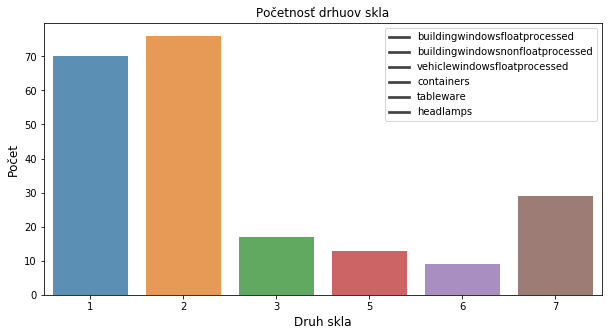

In [5]:
#Vykreslenie grafu pre početnosť druhov skla z datasetu
plt.figure(figsize=(10,5))
sns.barplot(y.value_counts().index,y.value_counts(), alpha=0.8)
plt.title('Početnosť drhuov skla')
plt.ylabel('Počet', fontsize=12)
plt.xlabel('Druh skla', fontsize=12)
plt.legend(types, loc='upper right')
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


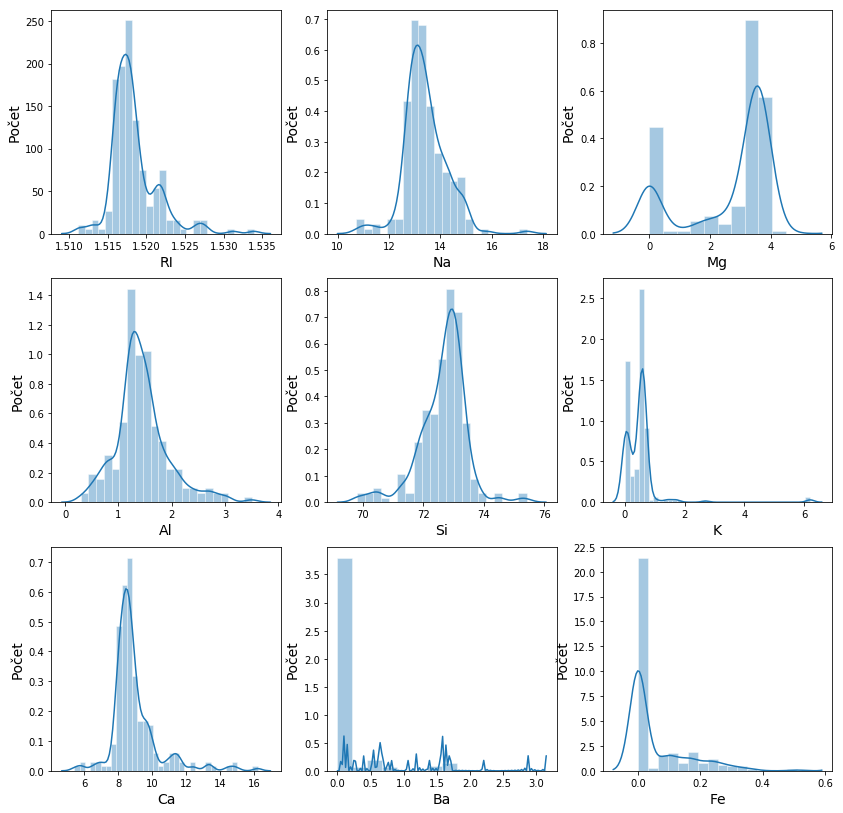

In [6]:
#Histogrami pre jednotlivě vlastnosti a prvky skla
f, axes = plt.subplots(3,3,figsize=(14,14))
sns.set_style('darkgrid')
sns.distplot(dataset['RI'], ax = axes[0,0])
axes[0,0].set_xlabel('RI', fontsize=14)
axes[0,0].set_ylabel('Počet', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.distplot(dataset['Na'], ax = axes[0,1])
axes[0,1].set_xlabel('Na', fontsize=14)
axes[0,1].set_ylabel('Počet', fontsize=14)
axes[0,1].yaxis.tick_left()

sns.distplot(dataset['Mg'], ax = axes[0,2])
axes[0,2].set_xlabel('Mg', fontsize=14)
axes[0,2].set_ylabel('Počet', fontsize=14)
axes[0,2].yaxis.tick_left()

sns.distplot(dataset['Al'], ax = axes[1,0])
axes[1,0].set_xlabel('Al', fontsize=14)
axes[1,0].set_ylabel('Počet', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.distplot(dataset['Si'], ax = axes[1,1])
axes[1,1].set_xlabel('Si', fontsize=14)
axes[1,1].set_ylabel('Počet', fontsize=14)
axes[1,1].yaxis.tick_left()

sns.distplot(dataset['K'], ax = axes[1,2])
axes[1,2].set_xlabel('K', fontsize=14)
axes[1,2].set_ylabel('Počet', fontsize=14)
axes[1,2].yaxis.tick_left()

sns.distplot(dataset['Ca'], ax = axes[2,0])
axes[2,0].set_xlabel('Ca', fontsize=14)
axes[2,0].set_ylabel('Počet', fontsize=14)
axes[2,0].yaxis.tick_left()

sns.distplot(dataset['Ba'], ax = axes[2,1])
axes[2,1].set_xlabel('Ba', fontsize=14)
axes[2,1].set_ylabel('Počet', fontsize=14)
axes[2,1].yaxis.tick_left()

sns.distplot(dataset['Fe'], ax = axes[2,2])
axes[2,2].set_xlabel('Fe', fontsize=14)
axes[2,2].set_ylabel('Počet', fontsize=14)
axes[2,2].yaxis.tick_left()

plt.show()

In [7]:
#Rozdelenie datasetu na trénovacie a testovacie časti
#Zamiešanie dát
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [8]:
#Výpis rozmerov trénovacích a testovacích dát
print("Rozmery X_train: ",X_train.shape)
print("Rozmery X_test: ", X_test.shape)
print("Rozmery y_train: ",y_train.shape)
print("Rozmery y_test",y_test.shape)

Rozmery X_train:  (171, 9)
Rozmery X_test:  (43, 9)
Rozmery y_train:  (171,)
Rozmery y_test (43,)


In [9]:
#Premena typov skla na kategorie
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

#Štandartizácia mierky dát
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)

In [10]:
print(y_train[161])
print(y_train_categorical[1])

print(X_train.iloc[79])
print(X_train_scaled[0])

3
[0. 0. 0. 1. 0. 0. 0. 0.]
RI     1.51646
Na    13.04000
Mg     3.40000
Al     1.26000
Si    73.01000
K      0.52000
Ca     8.58000
Ba     0.00000
Fe     0.00000
Name: 155, dtype: float64
[-0.84623746 -0.74467528  0.52636164  1.01287057  0.345884    0.33930631
 -0.68807645 -0.33761134 -0.60110996]


In [11]:
#Incilizácia modelu pre ANN 
model = Sequential()

#Pridávanie vrstiev do neuronovej siete
model.add(Dense(9, input_dim=9, activation = 'tanh'))
model.add(Dense(8, activation = 'softmax'))

#Kompilácia Neurónovej siete
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

#Učenie a validácia datasetu
history = model.fit(X_train_scaled, y_train_categorical, validation_data=(X_test_scaled, y_test_categorical),batch_size = 20, epochs = 200)

#Získavanie presnosti naučenej neuronovej siete
scores = model.evaluate(X_test_scaled, y_test_categorical)
scoresTrain = model.evaluate(X_train_scaled, y_train_categorical)

Train on 171 samples, validate on 43 samples
Epoch 1/200
171/171 [==============================] - 1s 4ms/step - loss: 0.1136 - accuracy: 0.0526 - val_loss: 0.1096 - val_accuracy: 0.1395
Epoch 2/200
171/171 [==============================] - 0s 227us/step - loss: 0.1117 - accuracy: 0.0585 - val_loss: 0.1078 - val_accuracy: 0.2326
Epoch 3/200
171/171 [==============================] - 0s 364us/step - loss: 0.1099 - accuracy: 0.0877 - val_loss: 0.1060 - val_accuracy: 0.2558
Epoch 4/200
171/171 [==============================] - 0s 248us/step - loss: 0.1081 - accuracy: 0.1228 - val_loss: 0.1042 - val_accuracy: 0.2558
Epoch 5/200
171/171 [==============================] - 0s 205us/step - loss: 0.1064 - accuracy: 0.2047 - val_loss: 0.1024 - val_accuracy: 0.3023
Epoch 6/200
171/171 [==============================] - 0s 200us/step - loss: 0.1048 - accuracy: 0.2456 - val_loss: 0.1006 - val_accuracy: 0.3488
Epoch 7/200
171/171 [==============================] - 0s 248us/step - loss: 0.1032 - a

Epoch 57/200
171/171 [==============================] - 0s 284us/step - loss: 0.0658 - accuracy: 0.6374 - val_loss: 0.0612 - val_accuracy: 0.6047
Epoch 58/200
171/171 [==============================] - 0s 253us/step - loss: 0.0656 - accuracy: 0.6374 - val_loss: 0.0611 - val_accuracy: 0.6047
Epoch 59/200
171/171 [==============================] - 0s 220us/step - loss: 0.0655 - accuracy: 0.6374 - val_loss: 0.0611 - val_accuracy: 0.6047
Epoch 60/200
171/171 [==============================] - 0s 352us/step - loss: 0.0653 - accuracy: 0.6433 - val_loss: 0.0609 - val_accuracy: 0.6047
Epoch 61/200
171/171 [==============================] - 0s 279us/step - loss: 0.0651 - accuracy: 0.6433 - val_loss: 0.0608 - val_accuracy: 0.6047
Epoch 62/200
171/171 [==============================] - 0s 338us/step - loss: 0.0649 - accuracy: 0.6374 - val_loss: 0.0607 - val_accuracy: 0.6047
Epoch 63/200
171/171 [==============================] - 0s 242us/step - loss: 0.0648 - accuracy: 0.6374 - val_loss: 0.0603 -

171/171 [==============================] - 0s 212us/step - loss: 0.0574 - accuracy: 0.7018 - val_loss: 0.0530 - val_accuracy: 0.6977
Epoch 114/200
171/171 [==============================] - 0s 228us/step - loss: 0.0573 - accuracy: 0.7018 - val_loss: 0.0528 - val_accuracy: 0.6977
Epoch 115/200
171/171 [==============================] - 0s 313us/step - loss: 0.0571 - accuracy: 0.7018 - val_loss: 0.0526 - val_accuracy: 0.6977
Epoch 116/200
171/171 [==============================] - 0s 760us/step - loss: 0.0570 - accuracy: 0.7018 - val_loss: 0.0523 - val_accuracy: 0.6977
Epoch 117/200
171/171 [==============================] - 0s 262us/step - loss: 0.0569 - accuracy: 0.7193 - val_loss: 0.0521 - val_accuracy: 0.6977
Epoch 118/200
171/171 [==============================] - 0s 244us/step - loss: 0.0567 - accuracy: 0.7193 - val_loss: 0.0519 - val_accuracy: 0.7209
Epoch 119/200
171/171 [==============================] - 0s 241us/step - loss: 0.0566 - accuracy: 0.7193 - val_loss: 0.0517 - val_ac

Epoch 169/200
171/171 [==============================] - 0s 271us/step - loss: 0.0515 - accuracy: 0.7251 - val_loss: 0.0482 - val_accuracy: 0.7209
Epoch 170/200
171/171 [==============================] - 0s 302us/step - loss: 0.0514 - accuracy: 0.7251 - val_loss: 0.0481 - val_accuracy: 0.7442
Epoch 171/200
171/171 [==============================] - 0s 296us/step - loss: 0.0513 - accuracy: 0.7251 - val_loss: 0.0482 - val_accuracy: 0.7209
Epoch 172/200
171/171 [==============================] - 0s 345us/step - loss: 0.0513 - accuracy: 0.7251 - val_loss: 0.0482 - val_accuracy: 0.7442
Epoch 173/200
171/171 [==============================] - 0s 356us/step - loss: 0.0512 - accuracy: 0.7251 - val_loss: 0.0482 - val_accuracy: 0.7209
Epoch 174/200
171/171 [==============================] - 0s 282us/step - loss: 0.0511 - accuracy: 0.7310 - val_loss: 0.0483 - val_accuracy: 0.7209
Epoch 175/200
171/171 [==============================] - 0s 275us/step - loss: 0.0510 - accuracy: 0.7310 - val_loss: 0

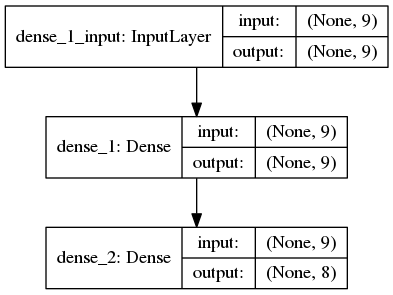

In [12]:
#Vizualizácia neuronovej siete
plot_model(model, show_shapes=True)

In [13]:
#Výpis presnosti a chyby neurónovej siete
print("============================================")
print(" Presnosť siete pre trénovacie data: %.2f%% " %(scoresTrain[1]*100))
print(" Chyba siete pre trénovacie data: %.2f%% " %(scoresTrain[0]*100))
print("============================================")
print(" Presnosť siete pre testovacie data: %.2f%% " %(scores[1]*100))
print(" Chyba siete pre testovacie data: %.2f%% " %(scores[0]*100))
print("============================================")

 Presnosť siete pre trénovacie data: 74.27% 
 Chyba siete pre trénovacie data: 4.92% 
 Presnosť siete pre testovacie data: 72.09% 
 Chyba siete pre testovacie data: 4.76% 


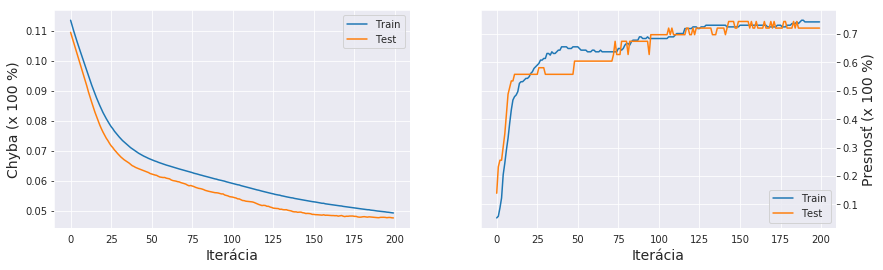

In [14]:
#Vizualizácia presnoti a chyby počas učenia a vyhodnocovania neuronovej siete
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Iterácia', fontsize=14)
axes[0].set_ylabel('Chyba (x 100 %)', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper right')

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_xlabel('Iterácia', fontsize=14)
axes[1].set_ylabel('Presnosť (x 100 %)', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='lower right')

plt.show()